In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import glmnet_python
from glmnet import glmnet
import time

In [2]:
beginning = time.perf_counter()
column_names = ["age", "gender", "height_cm", "weight_kg", "body fat_%",
"diastolic", "systolic", "grip_force", "sit_and_bend_forward_cm", "sit_up_count", "broad_jump_cm", "class"]

training = pd.read_csv('training.txt', sep=',', header = None, names = column_names)
testing = pd.read_csv('testing.txt', sep=',', header = None, names = column_names)

In [269]:
training["gender"].replace({'M': 1, 'F': 0}, inplace = True)
training = training.astype(float)
training.pop("grip_force")
training.pop("age")

testing["gender"].replace({'M': 1, 'F': 0}, inplace = True)
testing = testing.astype(float)
testing.pop("grip_force")
testing.pop("age")



0       29.0
1       36.0
2       60.0
3       31.0
4       32.0
        ... 
2006    25.0
2007    21.0
2008    39.0
2009    64.0
2010    34.0
Name: age, Length: 2011, dtype: float64

In [270]:
#EDA

<AxesSubplot:>

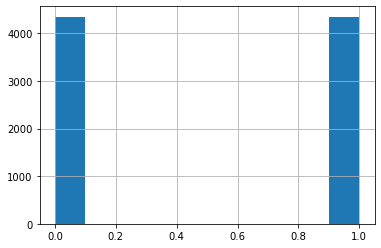

In [271]:
training["class"].hist()

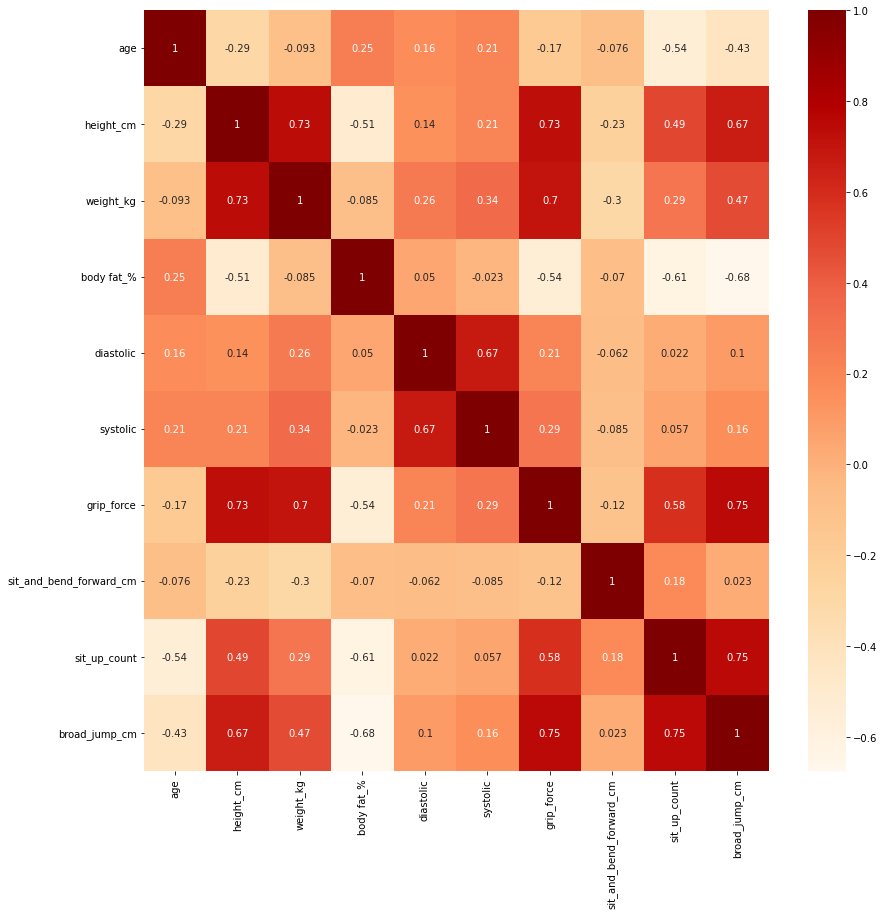

In [3]:
removing_class_corr = training.drop("class", axis = 1).corr()

plt.figure(figsize=(14,14))
correlation_visual = sns.heatmap(removing_class_corr, annot=True, cmap="OrRd")

<AxesSubplot:xlabel='height_cm', ylabel='Count'>

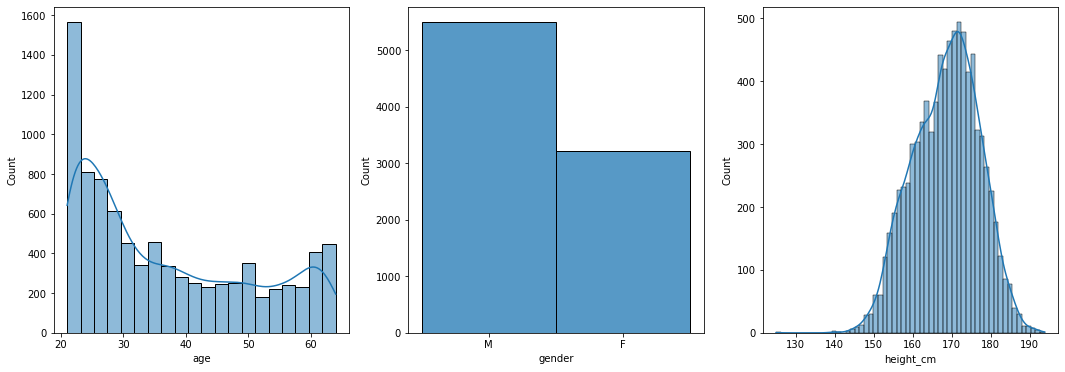

In [6]:
#fitting distributions to the predictor variables, naive is good to use for normal distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
sns.histplot(training, ax=axes[0], x="age", kde=True)
sns.histplot(training, ax=axes[1], x="gender", kde=False)
sns.histplot(training, ax=axes[2], x="height_cm", kde=True)

<AxesSubplot:xlabel='diastolic', ylabel='Count'>

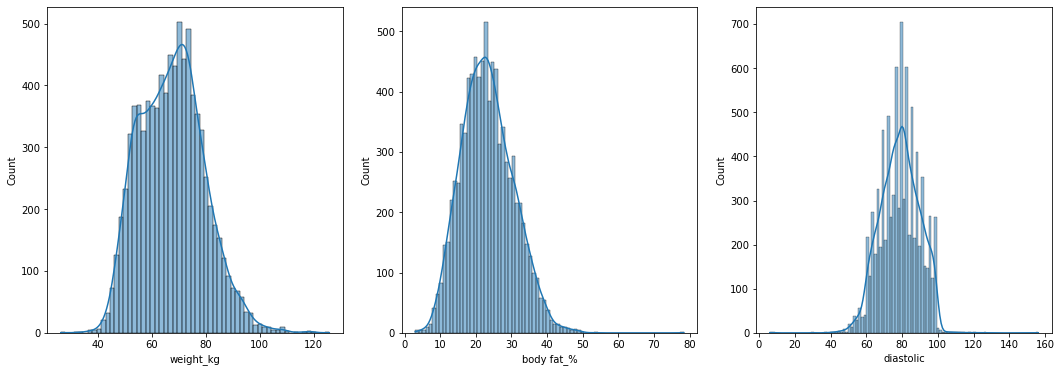

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
sns.histplot(training, ax=axes[0], x="weight_kg", kde=True)
sns.histplot(training, ax=axes[1], x="body fat_%", kde=True)
sns.histplot(training, ax=axes[2], x="diastolic", kde=True)

<AxesSubplot:xlabel='sit_and_bend_forward_cm', ylabel='Count'>

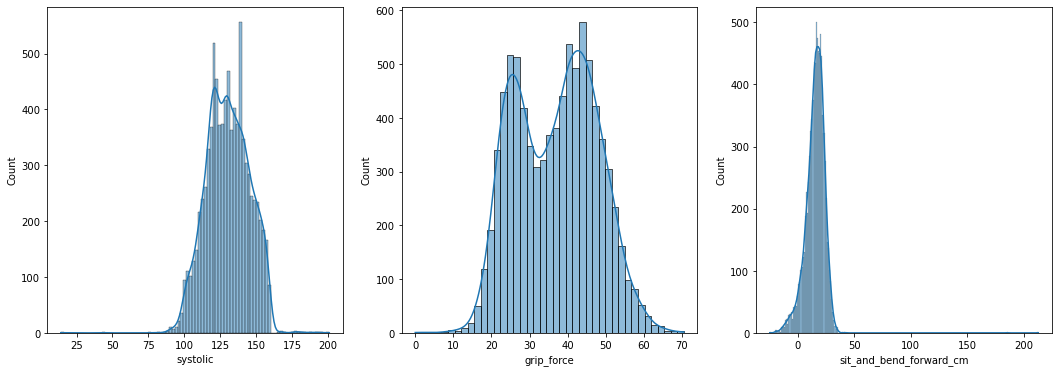

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)
sns.histplot(training, ax=axes[0], x="systolic", kde=True)
sns.histplot(training, ax=axes[1], x="grip_force", kde=True)
sns.histplot(training, ax=axes[2], x="sit_and_bend_forward_cm", kde=True)

<AxesSubplot:xlabel='broad_jump_cm', ylabel='Count'>

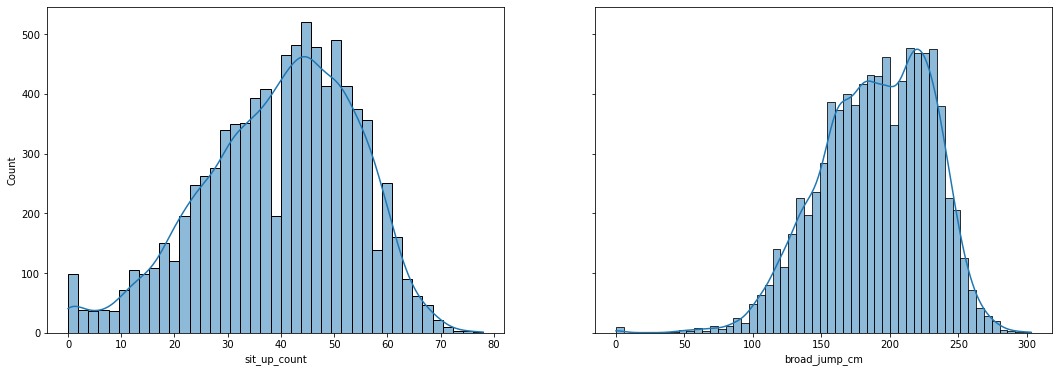

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(training, ax=axes[0], x="sit_up_count", kde=True)
sns.histplot(training, ax=axes[1], x="broad_jump_cm", kde=True)

In [277]:
#Naive Bayes, Algo
#https://www.machinelearningplus.com/predictive-modeling/how-naive-bayes-algorithm-works-with-example-and-full-code

In [278]:
#Step 1: Computing Prior probabilities for each of the class of Y


In [279]:
#Step 2: Calculating probability of likelihood of evidences (Assuming all predictor variables are independent), so using Gaussian distribution

def single_likelihood(dataset, X_name, X_value, Y_column, Y_value):
    list(dataset.columns)
    new_dataset = dataset[dataset[Y_column] == Y_value]
    mean = new_dataset[X_name].mean()
    std = new_dataset[X_name].std()
    left_side_likelihood = 1 / (std * np.sqrt(2 * np.pi))
    right_side_likelihood = np.exp(-0.5*((X_value - mean) / std) ** 2)
    computed_likelihood =  left_side_likelihood * right_side_likelihood
    return computed_likelihood
    

In [280]:
#Step 2 (continued): Calculating numerator for baye's rule for all y and compare to find maximum


def posterior(dataset, X_rows, Y_column):
    X_predictors = list(dataset.columns[:-1])
    Y_classes = list(dataset[Y_column].unique())
    priorr = [0.5]*2
    predictions = []
    
    for i in X_rows:
        total_likelihoods = [1]*2
        numerator = []
        for j in range(len(Y_classes)):
            for k in range(len(X_predictors)):
                total_likelihoods[j] *= single_likelihood(dataset, X_predictors[k], i[k], Y_column, Y_classes[j])
            numerator.append(total_likelihoods[j] * priorr[j])

        predictions.append(np.argmax(numerator))
        
    
    return predictions
        

In [281]:
X_test = testing.drop("class", axis = 1).values
Y_test = testing["class"].values
X_train = training.drop("class", axis = 1).values
Y_train = training["class"].values
Y_pred = posterior(training, X_test, "class")
Y1_pred = posterior(training, X_train, "class")


In [286]:
np.sum(Y_pred == Y_test) / len(Y_pred)


0.7901541521631029

In [287]:
np.sum(Y1_pred == Y_train) / len(Y_train)


0.7732077205882353

In [285]:
end = time.perf_counter()
timing = end -beginning
print(timing)

10.270845667000685
